In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Show the first 5 rows
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Check the structure and data types
data.info()

# Check for missing values in each column
print("\nMissing values in each column:")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
# Select the relevant columns for clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()

# Display the first 5 rows to confirm
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


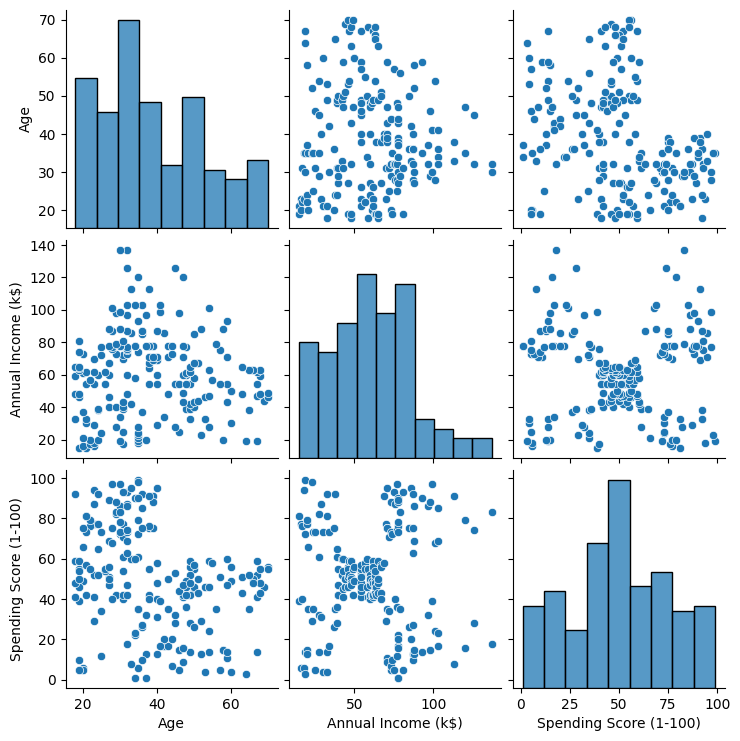

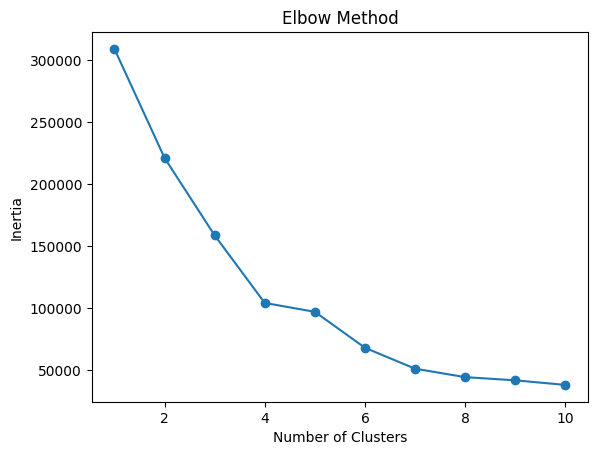

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Visualize the data using pairplot
sns.pairplot(X)
plt.show()

# Find the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [8]:
# Apply K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)

# Display the first 10 rows to see the assigned clusters
X.head(10)

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,0
3,23,16,77,2
4,31,17,40,0
5,22,17,76,2
6,35,18,6,0
7,23,18,94,2
8,64,19,3,0
9,30,19,72,2


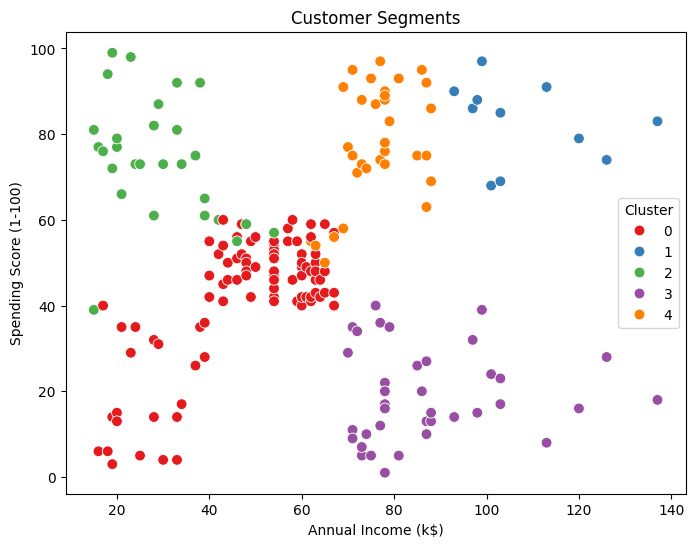

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=X,
    s=60
)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [10]:
# Calculate the mean values for each cluster
cluster_summary = X.groupby('Cluster').mean()
cluster_summary

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,46.213483,47.719101,41.797753
1,32.454545,108.181818,82.727273
2,24.689655,29.586207,73.655172
3,40.394737,87.000000,18.631579
4,31.787879,76.090909,77.757576


Cluster 0:
    Average Age: ~46
    Average Annual Income: ~$48,000
    Average Spending Score: ~42
    Description: Older customers with moderate income and average spending behavior. Likely represent mature    consumers with balanced purchasing habits.

Cluster 1:
    Average Age: ~32
    Average Annual Income: ~$108,000
    Average Spending Score: ~83
    Description: Young, high-income, high-spending customers. Likely the most valuable segment for the mall.

Cluster 2:
    Average Age: ~25
    Average Annual Income: ~$30,000
    Average Spending Score: ~74
    Description: Very young customers with low income but high spending. Possibly students or young professionals who spend significantly relative to their earnings.

Cluster 3:
    Average Age: ~40
    Average Annual Income: ~$87,000
    Average Spending Score: ~19
    Description: Middle-aged, high-income customers with very low spending. Likely conservative or selective shoppers.

Cluster 4:
    Average Age: ~32
    Average Annual Income: ~$76,000
    Average Spending Score: ~78
    Description: Young adults with moderately high income and high spending. A financially stable and active consumer segment.